In [3]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: magrittr

Attaching package: ‘forecast’

The following object is masked from ‘package:ggpubr’:

    gghistogram

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [4]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

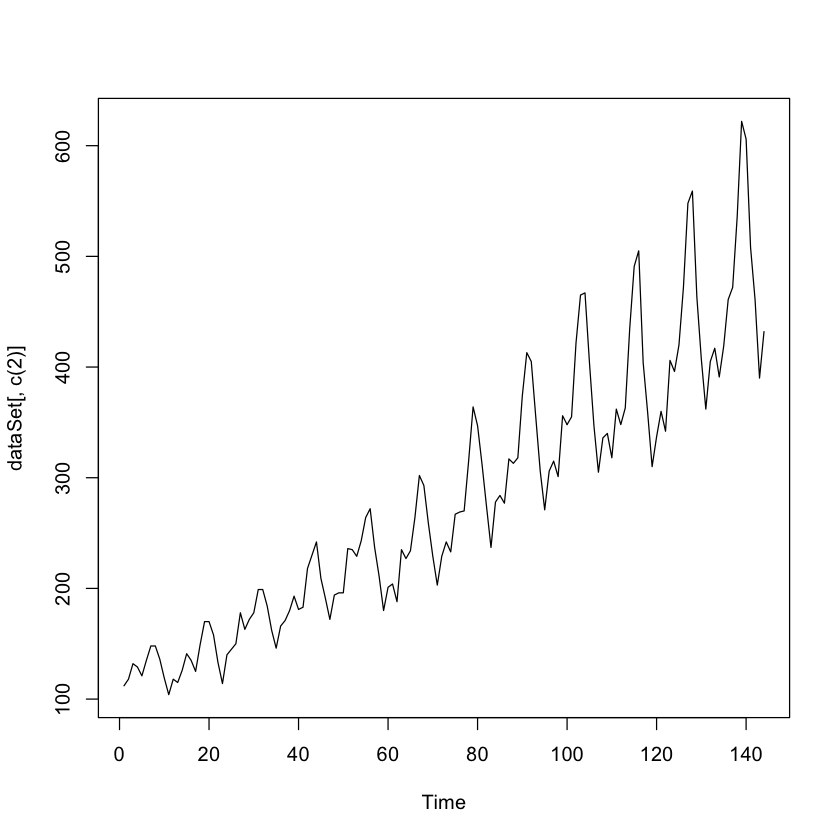

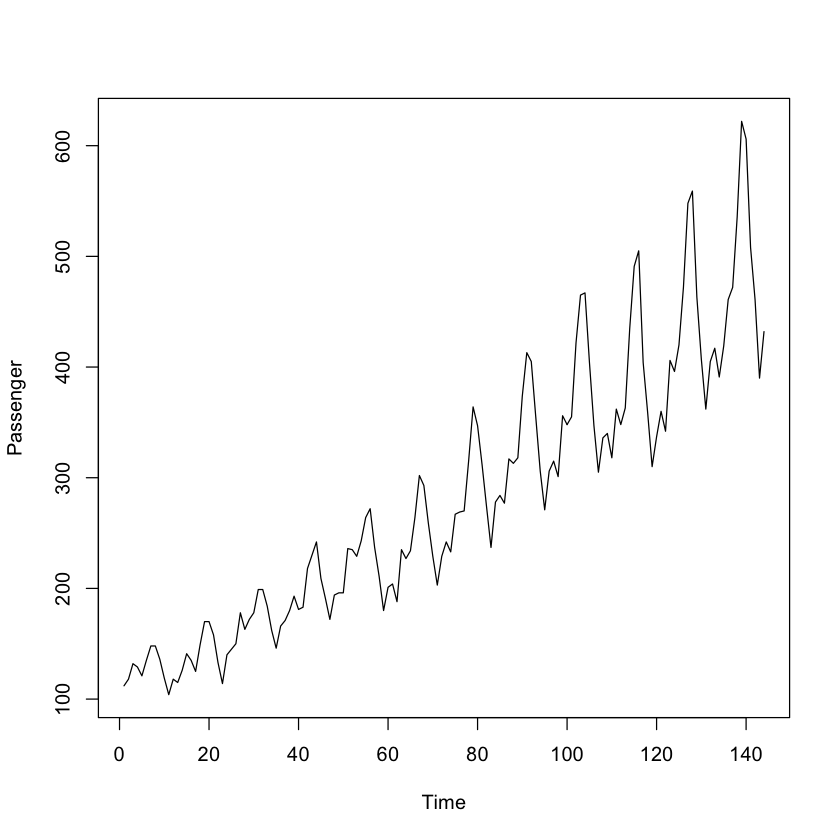

In [5]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [6]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

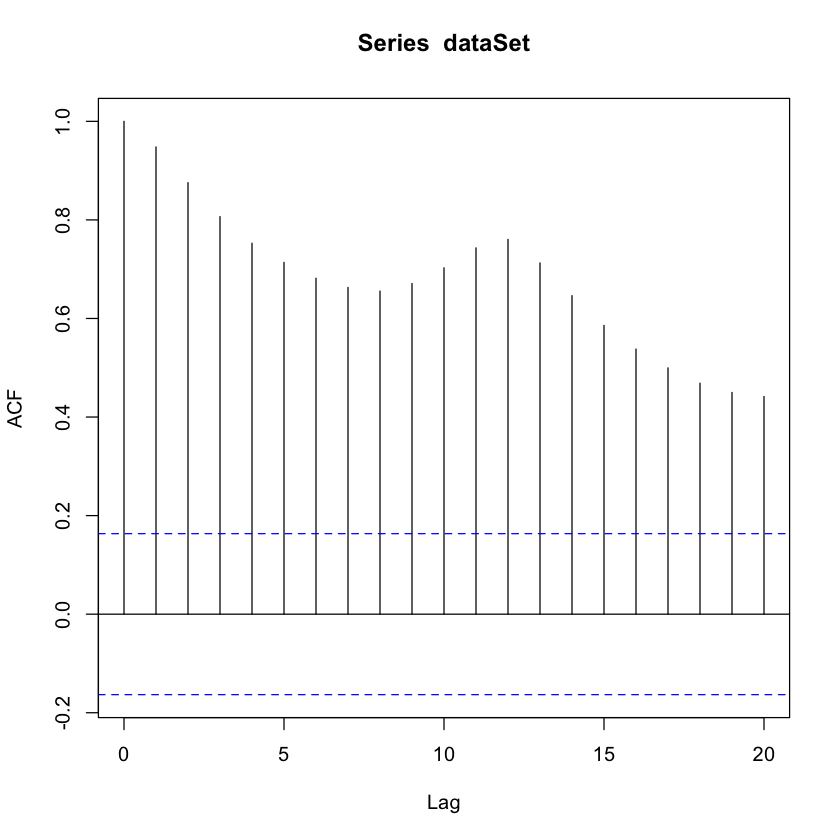

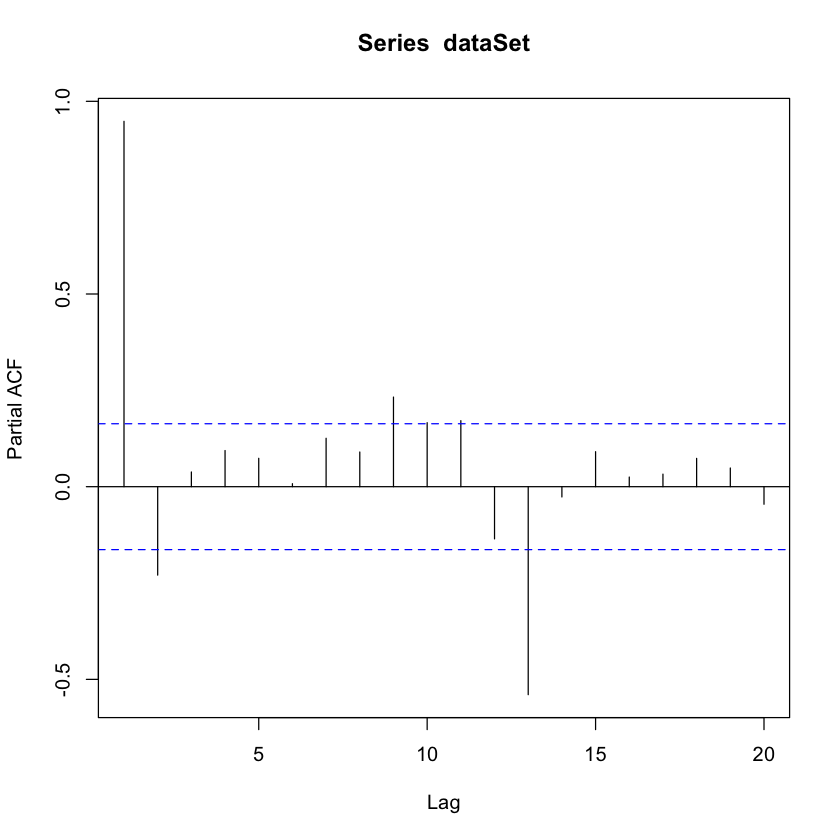

In [7]:
# Finding Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using ACF()
acf(dataSet, lag.max=20)   

# Finding Partial Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using PACF()
pacf(dataSet, lag.max=20)  


	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 38.071, df = 10, p-value = 3.689e-05

Model df: 0.   Total lags used: 10

[1] 0.9057236


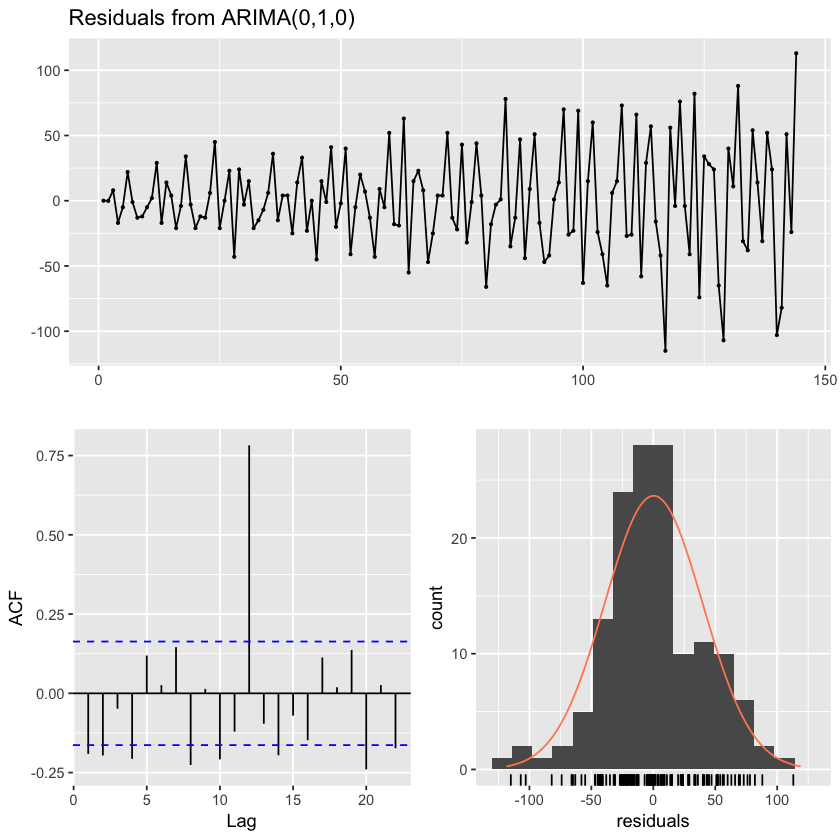

    Point Forecast       Lo 80     Hi 80       Lo 95     Hi 95
145            474   423.10204  524.8980   396.15828  551.8417
146            516   402.18869  629.8113   341.94063  690.0594
147            558   367.55726  748.4427   266.74296  849.2570
148            600   321.22037  878.7796   173.64335 1026.3567
149            642   264.53060 1019.4694    64.71036 1219.2896
150            684   198.46437 1169.5356   -58.56267 1426.5627
151            726   123.76717 1328.2328  -195.03564 1647.0356
152            768    41.03166 1494.9683  -343.80213 1879.8021
153            810   -49.25653 1669.2565  -504.11946 2124.1195
154            852  -146.69017 1850.6902  -675.36481 2379.3648
155            894  -250.92139 2038.9214  -857.00617 2645.0062
156            936  -361.64856 2233.6486 -1048.58222 2920.5822
157            978  -478.60690 2434.6069 -1249.68801 3205.6880
158           1020  -601.56153 2641.5615 -1459.96435 3499.9644
159           1062  -730.30227 2854.3023 -1679.08977 38

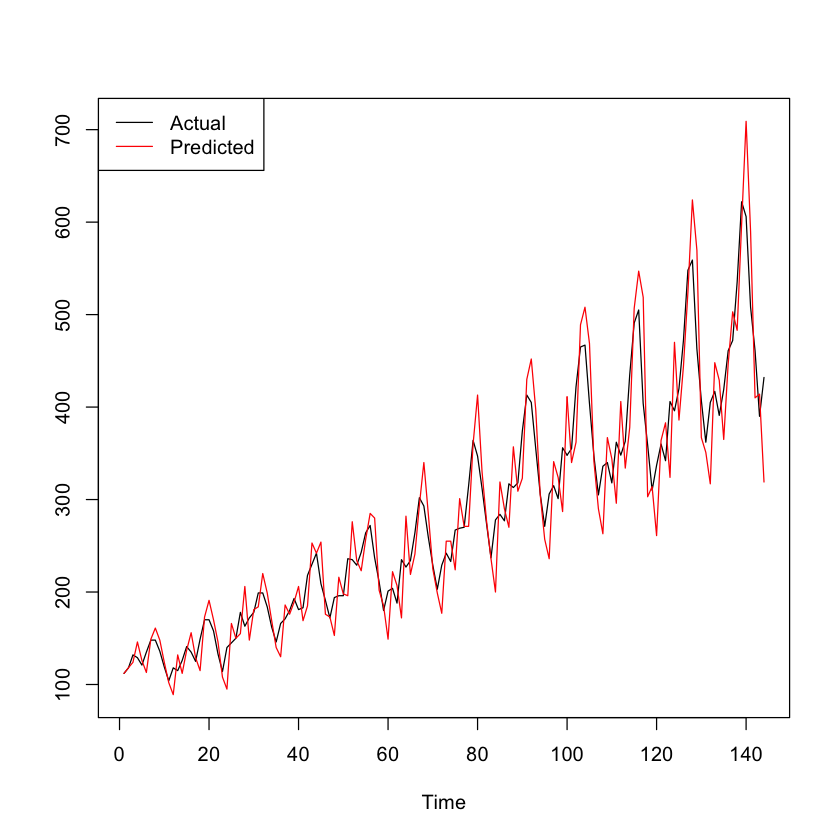

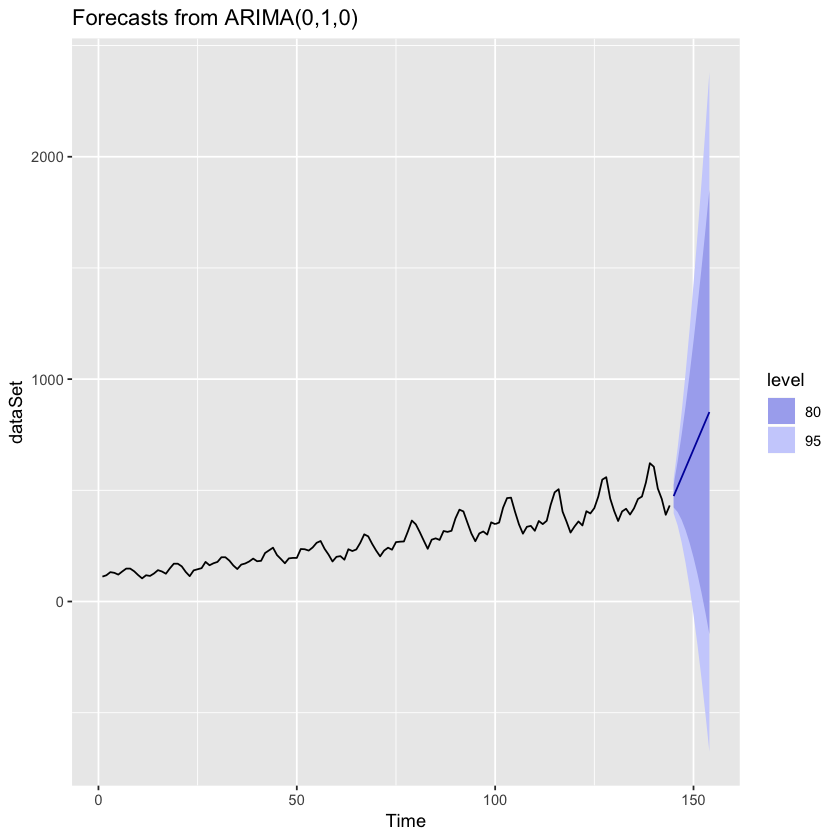

In [8]:
# ARIMA Model with seasonality
fit_arima  <- arima(dataSet,  order = c(0,1,0), seasonal = c(0,1,0)); 
checkresiduals(fit_arima) 

# Calculate R squared value : r2
r2 <- cor(fitted(fit_arima),  dataSet)^2;  print(r2)

x <- dataSet            # actual
y <- fitted(fit_arima)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)

# Plotting Observed and Predicted with CI
forecast <- forecast:::forecast.Arima(fit_arima, h = 25)
print(forecast); autoplot(forecast(fit_arima))